In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install -q datasets numpy pandas scikit-learn tensorflow matplotlib seaborn


In [3]:
import numpy as np
import pandas as pd
import pickle
import tensorflow as tf

from datasets import load_dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences

Load Saved Artifacts

In [4]:
model = tf.keras.models.load_model("ticket_lstm_model.keras")

with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

Load Dataset & Create Test Split

In [5]:
ds = load_dataset("Tobi-Bueck/customer-support-tickets")
df = pd.DataFrame(ds["train"])
df = df[["body", "queue"]].dropna()

_, test_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df["queue"]
)


README.md: 0.00B [00:00, ?B/s]

aa_dataset-tickets-multi-lang-5-2-50-ver(…):   0%|          | 0.00/26.0M [00:00<?, ?B/s]

(…)set-tickets-german_normalized_50_5_2.csv: 0.00B [00:00, ?B/s]

dataset-tickets-multi-lang-4-20k.csv:   0%|          | 0.00/18.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/61765 [00:00<?, ? examples/s]

Preprocess Test Data

In [6]:
def clean_text(text):
    return text.lower().replace("\n", " ").strip()

MAX_LEN = 200

X_test = pad_sequences(
    tokenizer.texts_to_sequences(test_df["body"].apply(clean_text)),
    maxlen=MAX_LEN,
    padding="post",
    truncating="post"
)

y_test = label_encoder.transform(test_df["queue"])


Generate Predictions

In [7]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

387/387 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [8]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.22966081113899459

In [9]:
report = classification_report(
    y_test,
    y_pred,
    target_names=label_encoder.classes_
)

print(report)


                                        precision    recall  f1-score   support

           Arts & Entertainment/Movies       0.00      0.00      0.00        52
            Arts & Entertainment/Music       0.00      0.00      0.00        60
          Autos & Vehicles/Maintenance       0.00      0.00      0.00        59
                Autos & Vehicles/Sales       0.00      0.00      0.00        73
            Beauty & Fitness/Cosmetics       0.00      0.00      0.00        60
     Beauty & Fitness/Fitness Training       0.00      0.00      0.00        58
                  Billing and Payments       0.00      0.00      0.00       975
            Books & Literature/Fiction       0.00      0.00      0.00        58
        Books & Literature/Non-Fiction       0.00      0.00      0.00        64
   Business & Industrial/Manufacturing       0.00      0.00      0.00        69
                      Customer Service       0.00      0.00      0.00      1484
                   Finance/Investments 

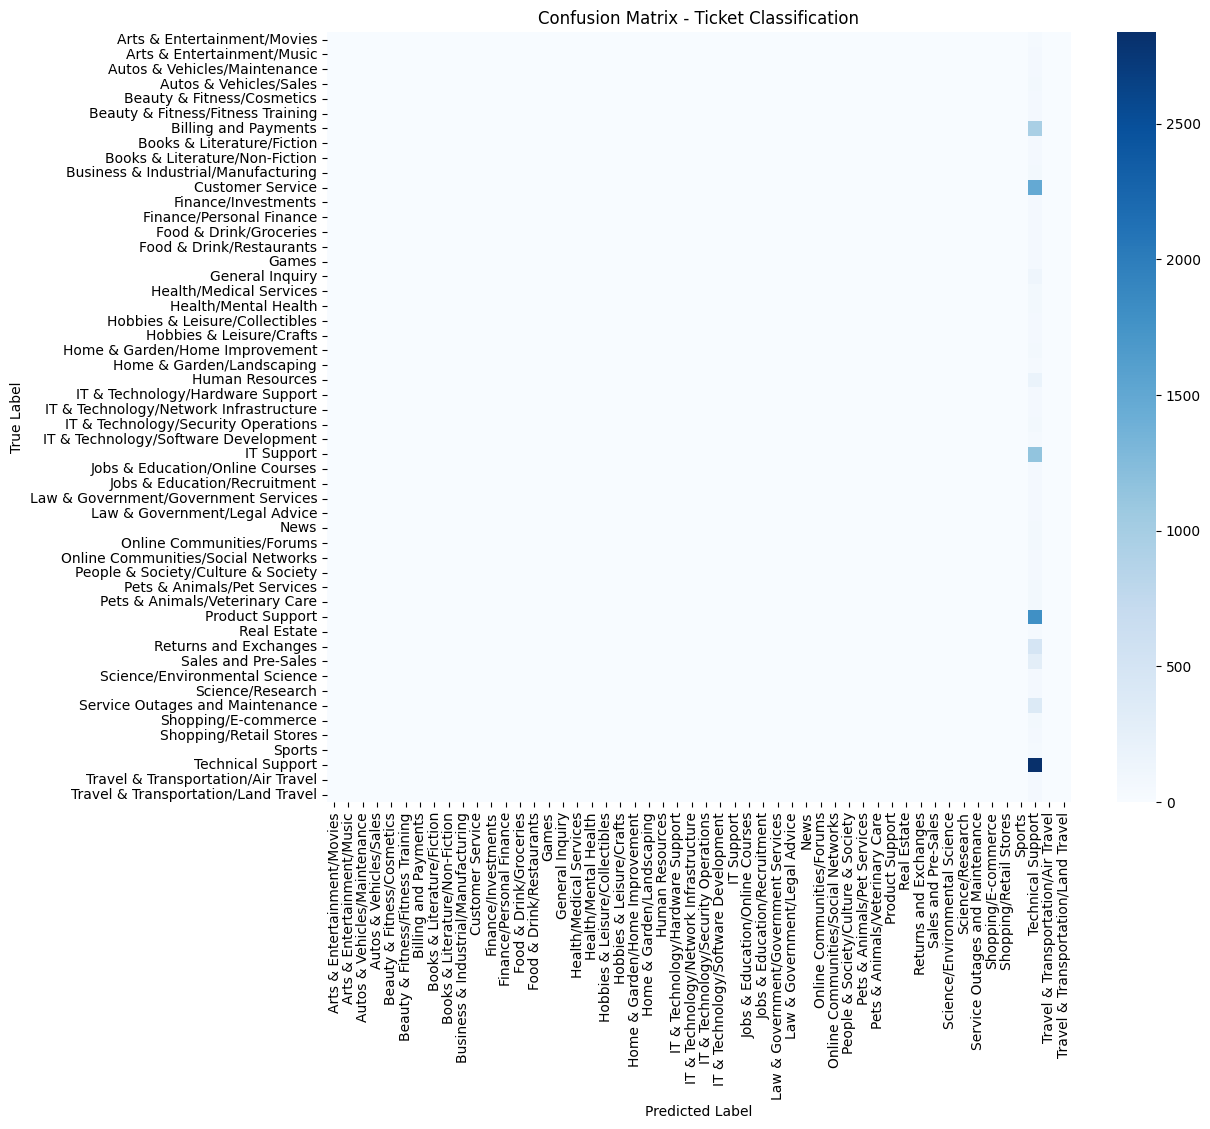

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(
    cm,
    cmap="Blues",
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Ticket Classification")
plt.show()


In [12]:
plt.savefig("confusion_matrix.png")

<Figure size 640x480 with 0 Axes>